### Plot PSTHs of hippocampal units, by features and RPE

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils
import utils.behavioral_utils as behavioral_utils

import os
import pandas as pd
import matplotlib

In [4]:
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
SESS_BEHAVIOR_PATH = "/data/rawdata/sub-SA/sess-{sess_name}/behavior/sub-SA_sess-{sess_name}_object_features.csv"

PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "FeedbackOnset"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

In [5]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
units = spike_utils.get_unit_positions(valid_sess)
hf_units = units[units.structure_level3 == "hippocampal_formation (HF)"]
len(hf_units)

19

In [6]:
def plot_features_frs_for_unit(unit_row):
    session = unit_row.session
    unit_id = unit_row.UnitID

    behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
    beh = pd.read_csv(behavior_path)

    # filter trials 
    valid_beh = behavioral_utils.get_valid_trials(beh)
    feature_selections = behavioral_utils.get_selection_features(valid_beh)
    valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber")
    valid_beh_rpes = behavioral_utils.get_rpe_groups_per_session(session, valid_beh)
    fr_path = f"/data/patrick_res/firing_rates/{session}_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{SMOOTH}_smooth.pickle"
    frs = pd.read_pickle(fr_path)

    pos = spike_utils.get_unit_positions_per_sess(session)
    pos = pos.fillna("unknown")
    pos = spike_utils.get_manual_structure(pos)

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    group_names = FEATURE_DIMS + ["RPEGroup"]
    # print(session)
    for i, group_name in enumerate(group_names):
        # print(group_name)
        visualization_utils.plot_mean_frs_by_group(session, unit_id, frs, valid_beh_rpes, group_name, pos, axs[i], mode="FiringRate", group_colors=None)



12    None
12    None
13    None
14    None
22    None
13    None
6     None
4     None
1     None
12    None
11    None
4     None
3     None
3     None
4     None
20    None
15    None
7     None
15    None
dtype: object

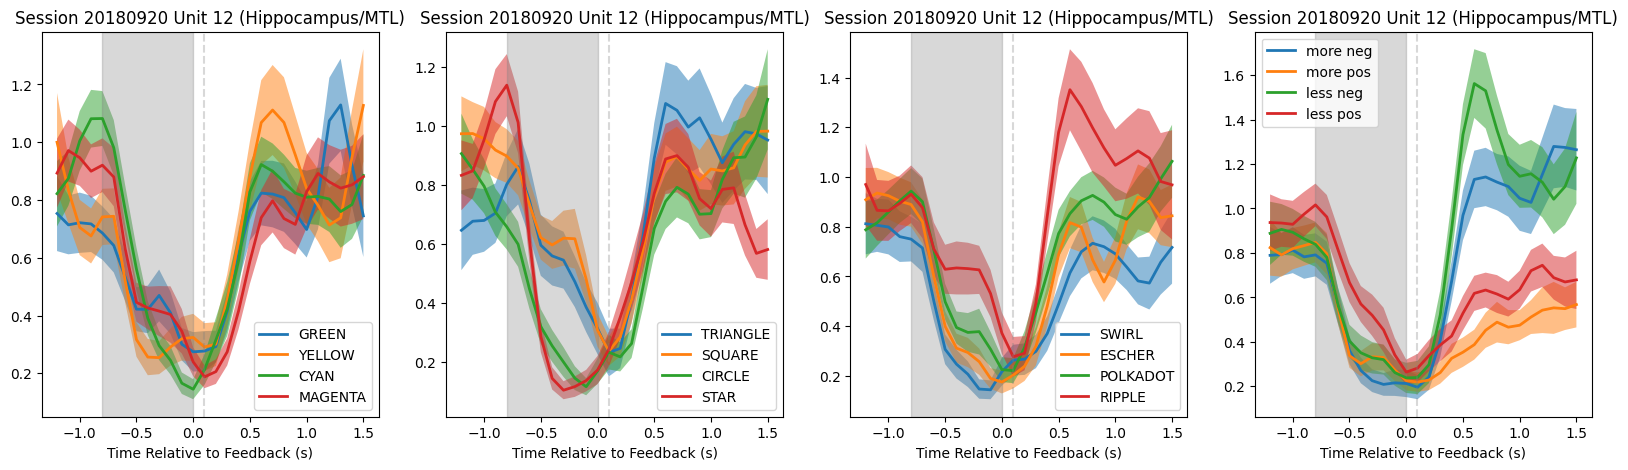

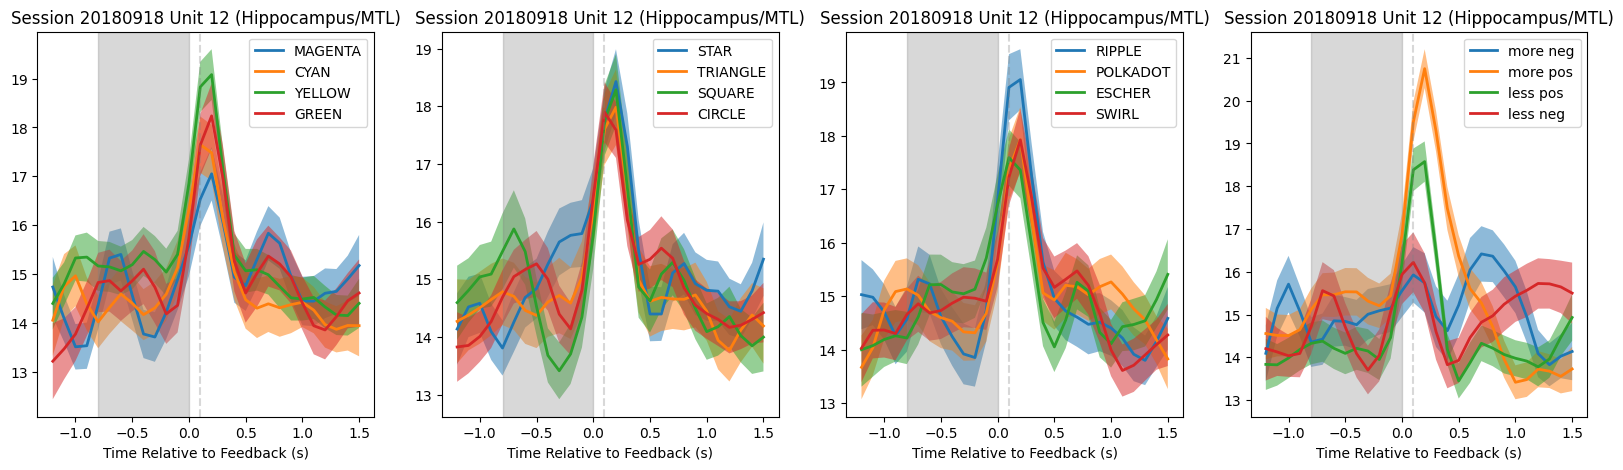

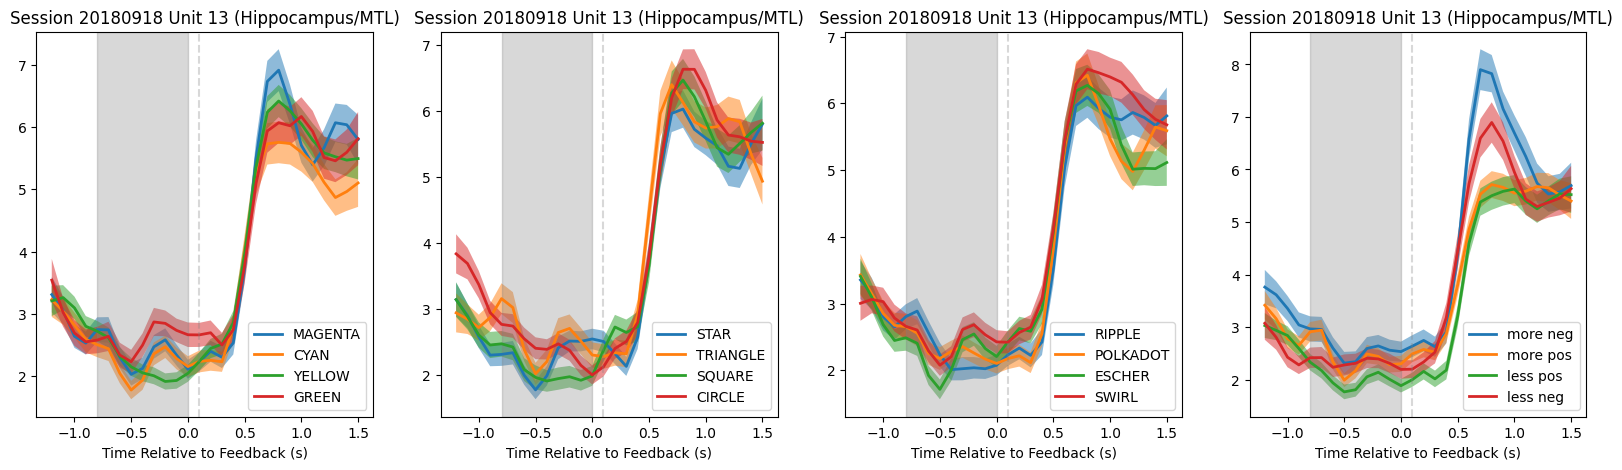

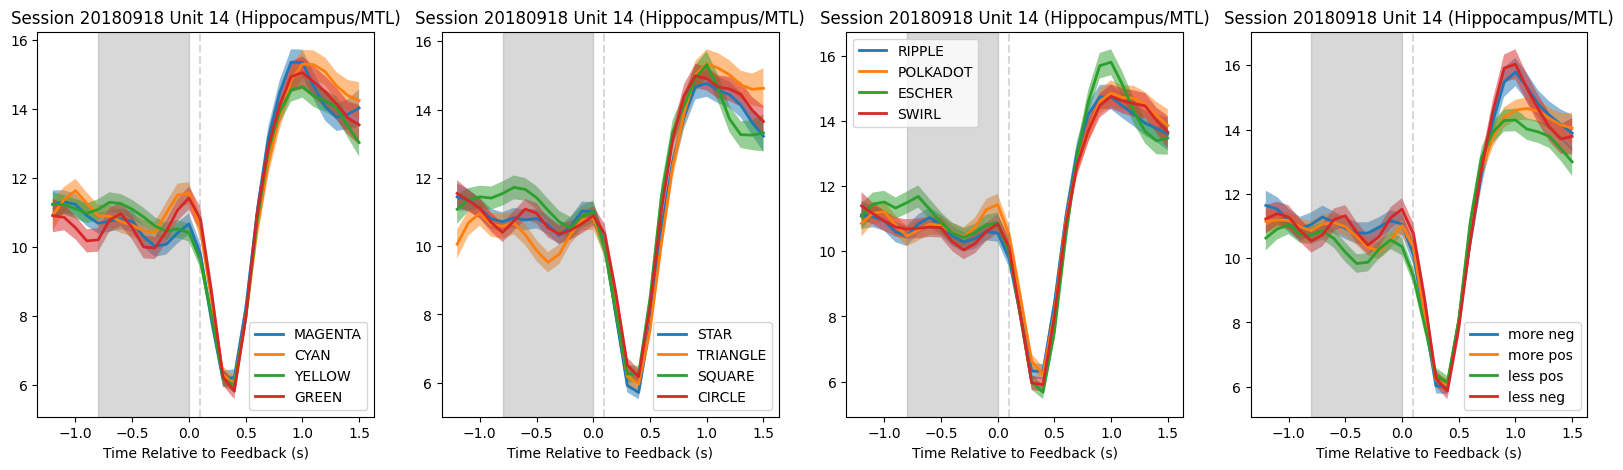

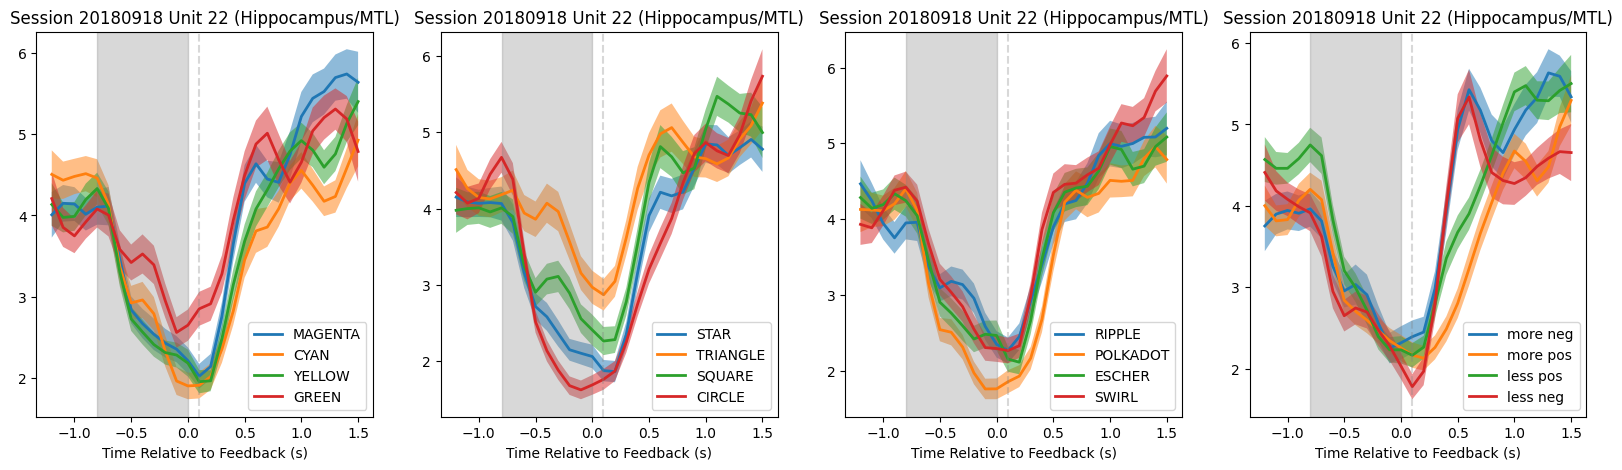

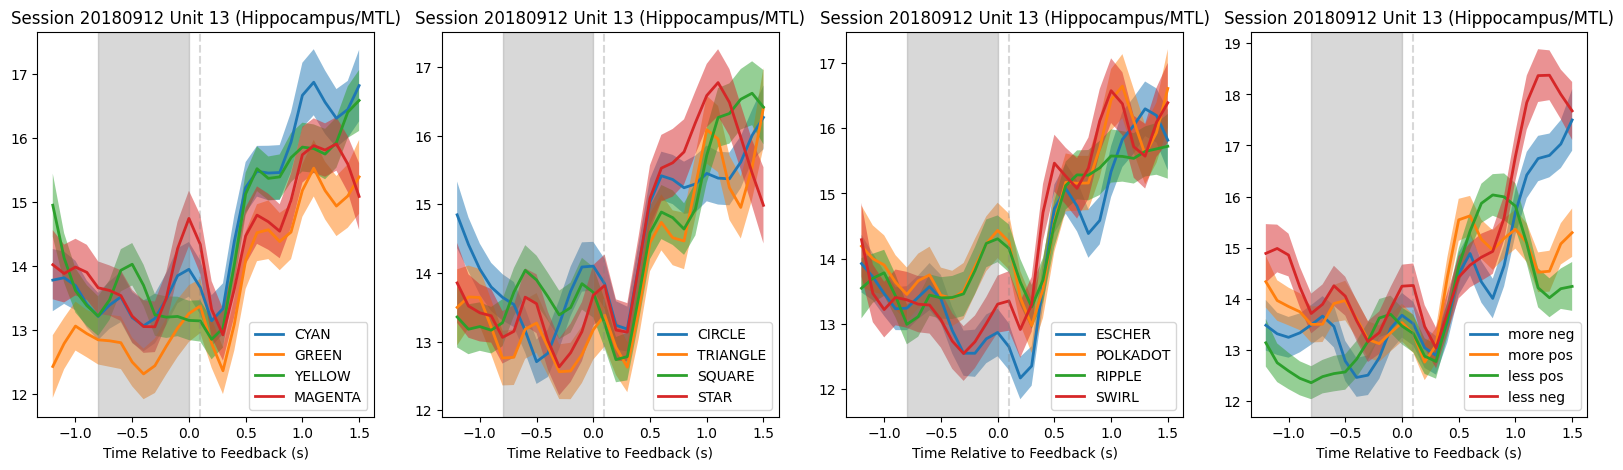

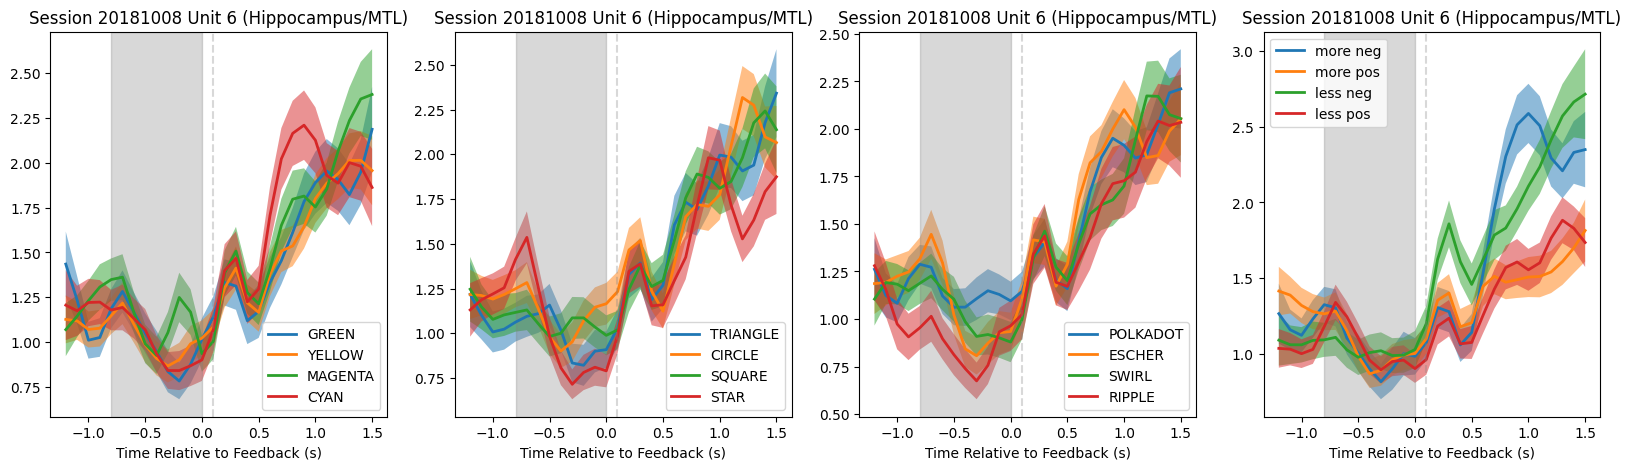

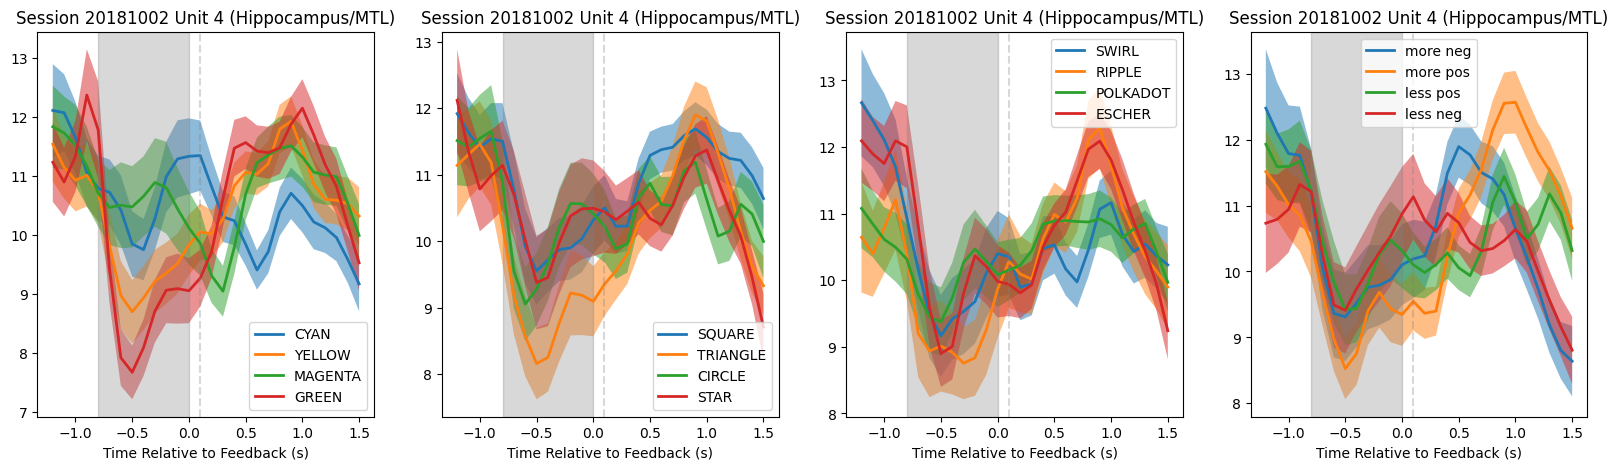

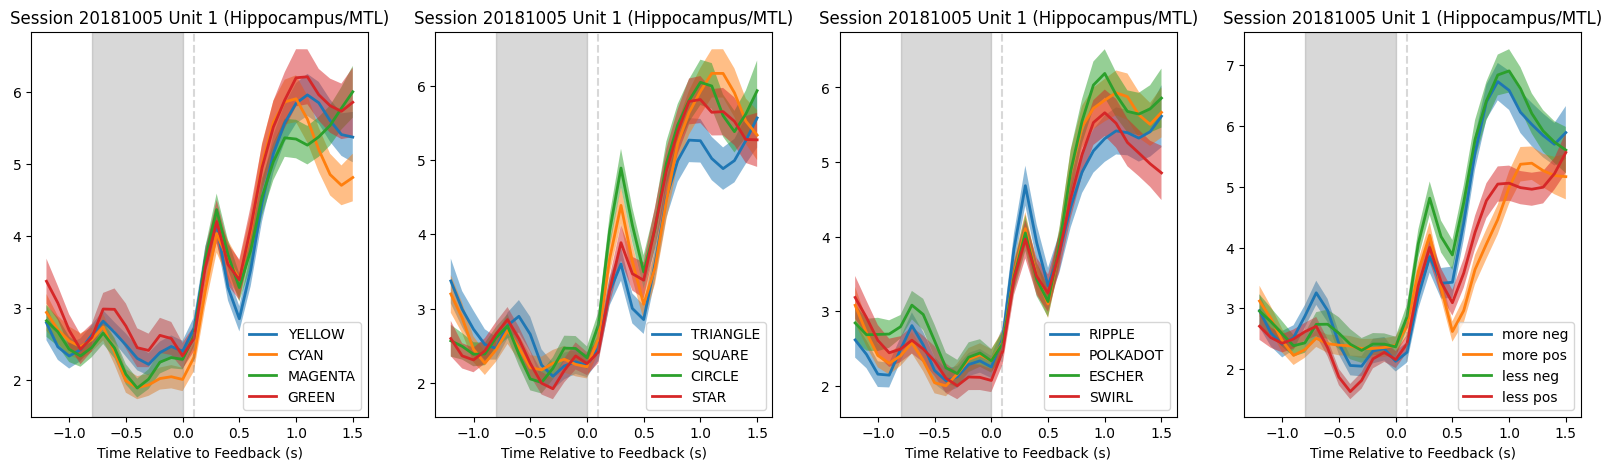

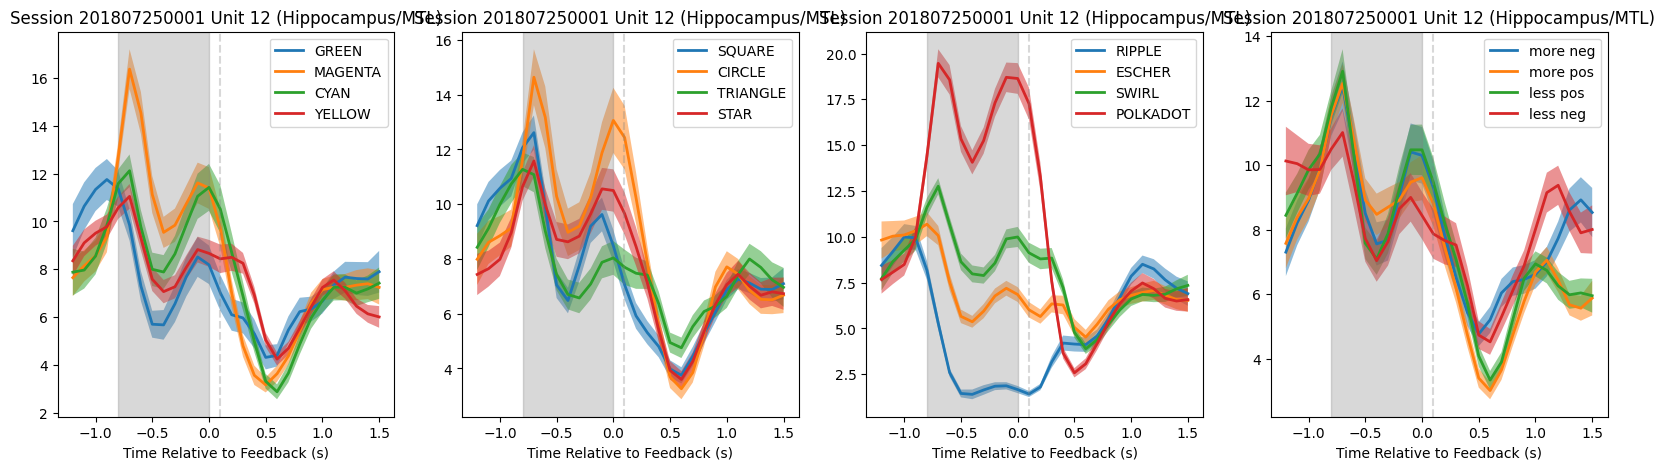

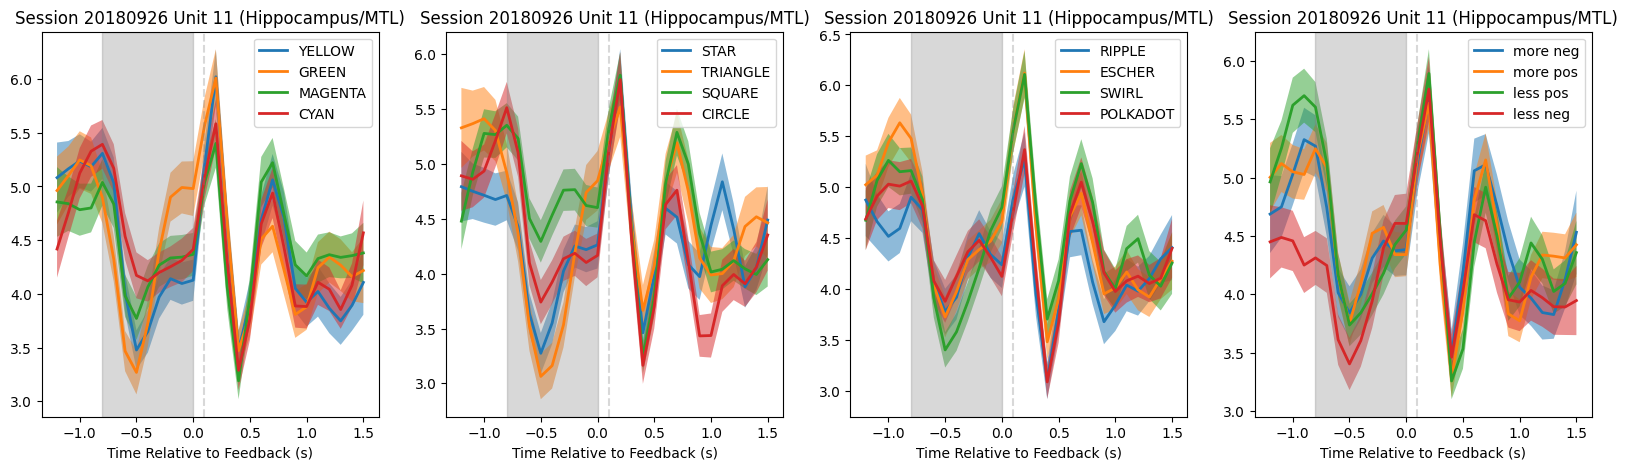

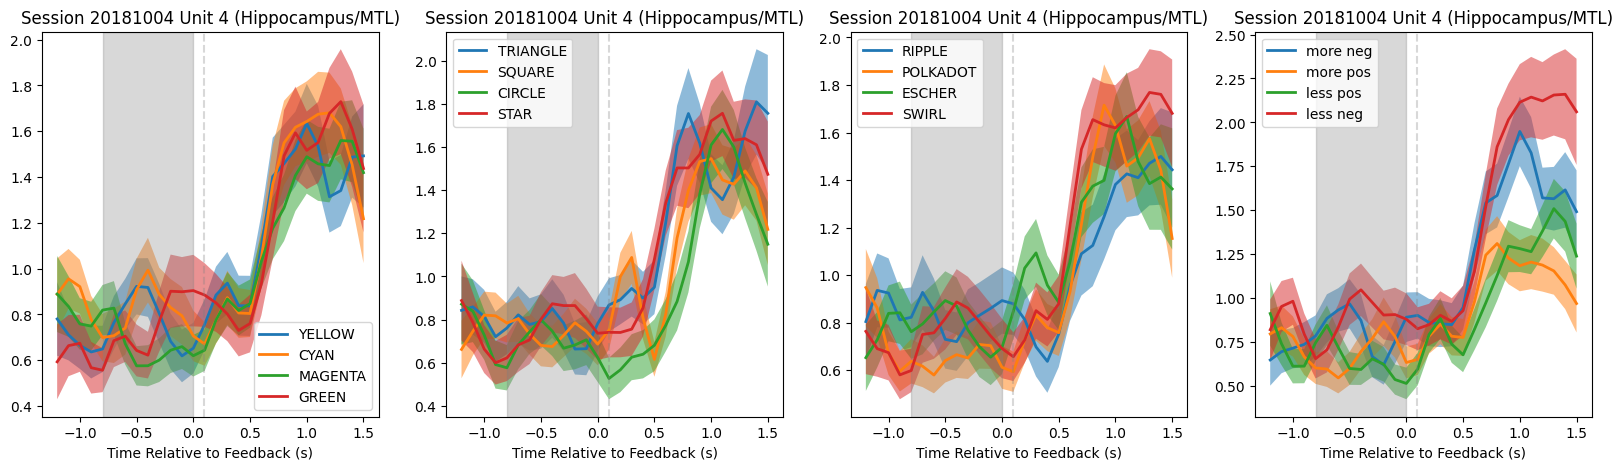

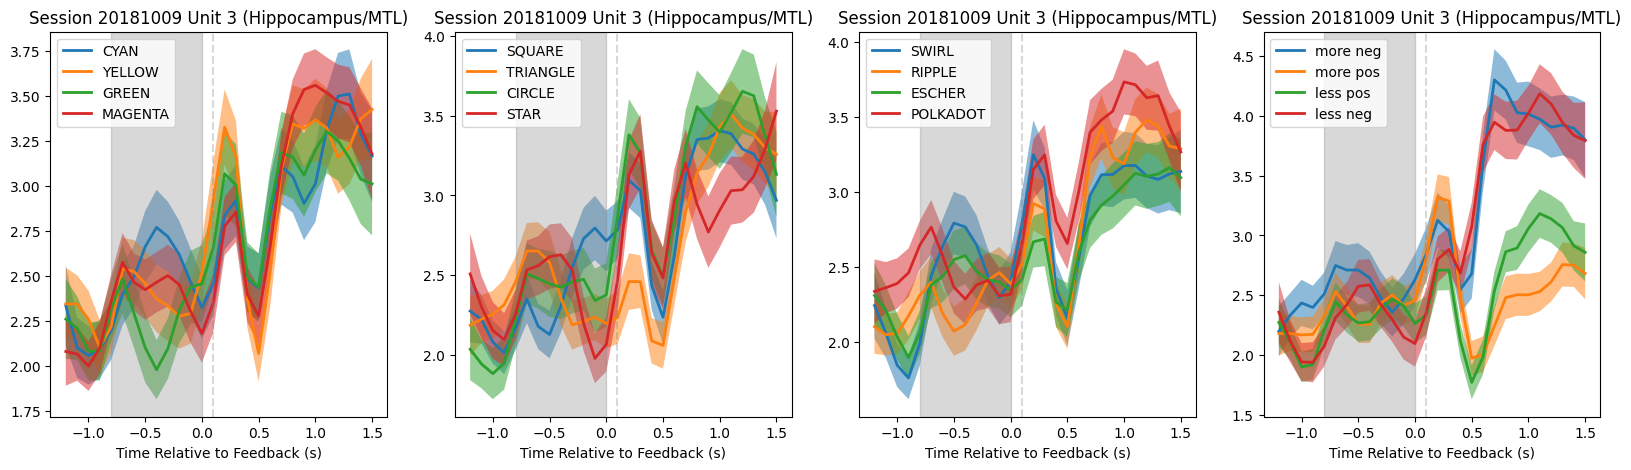

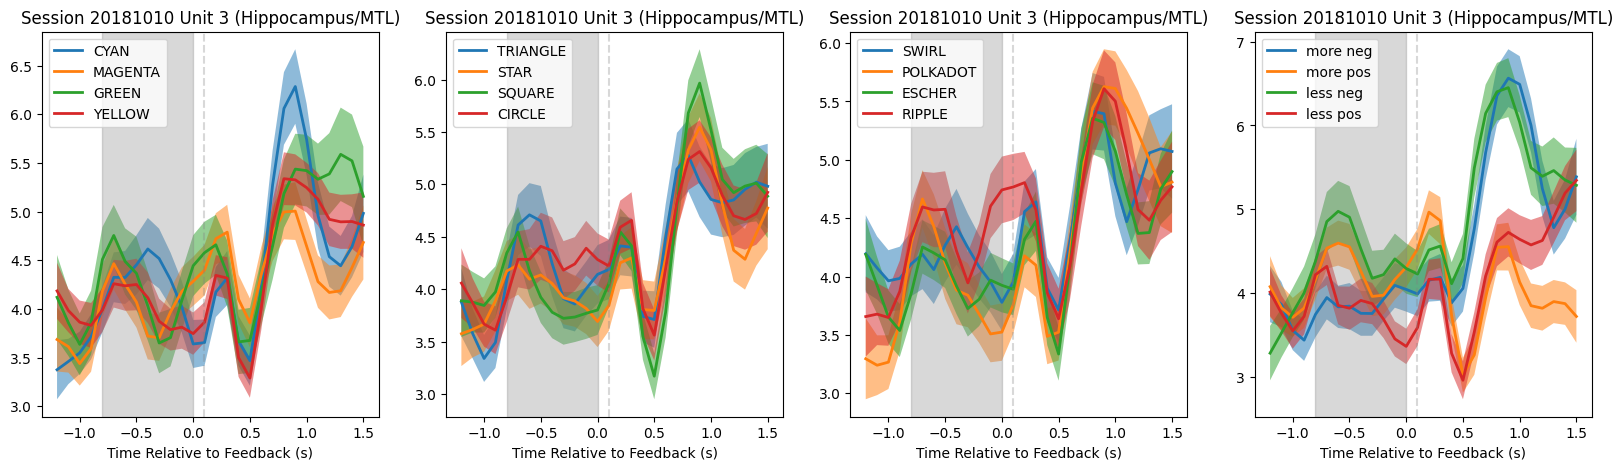

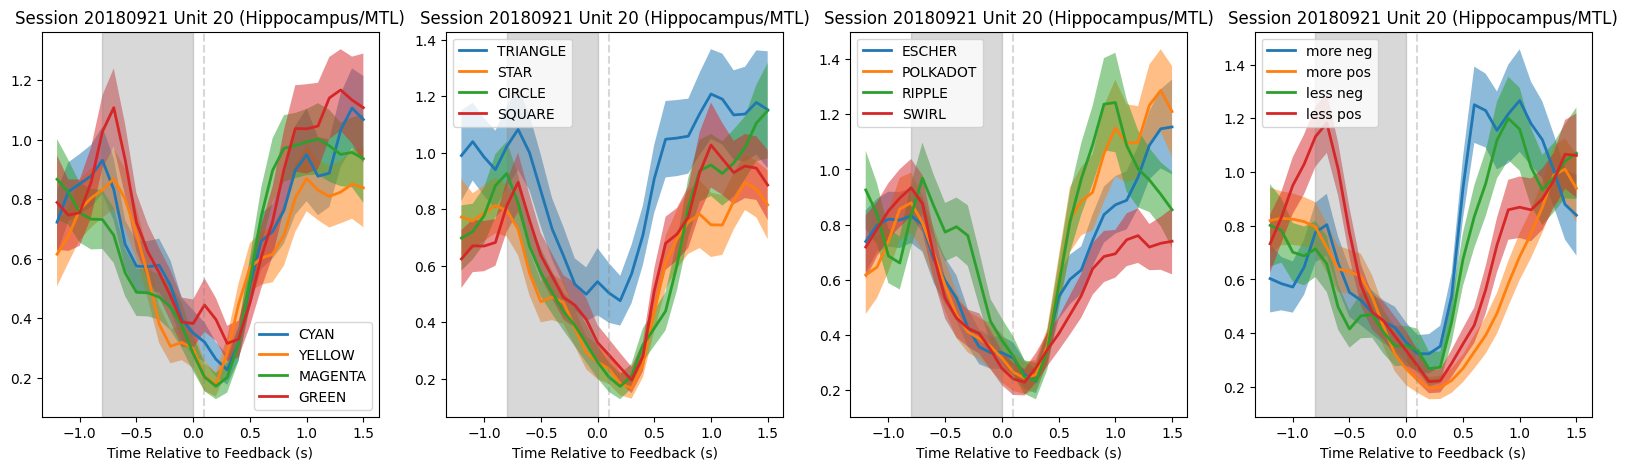

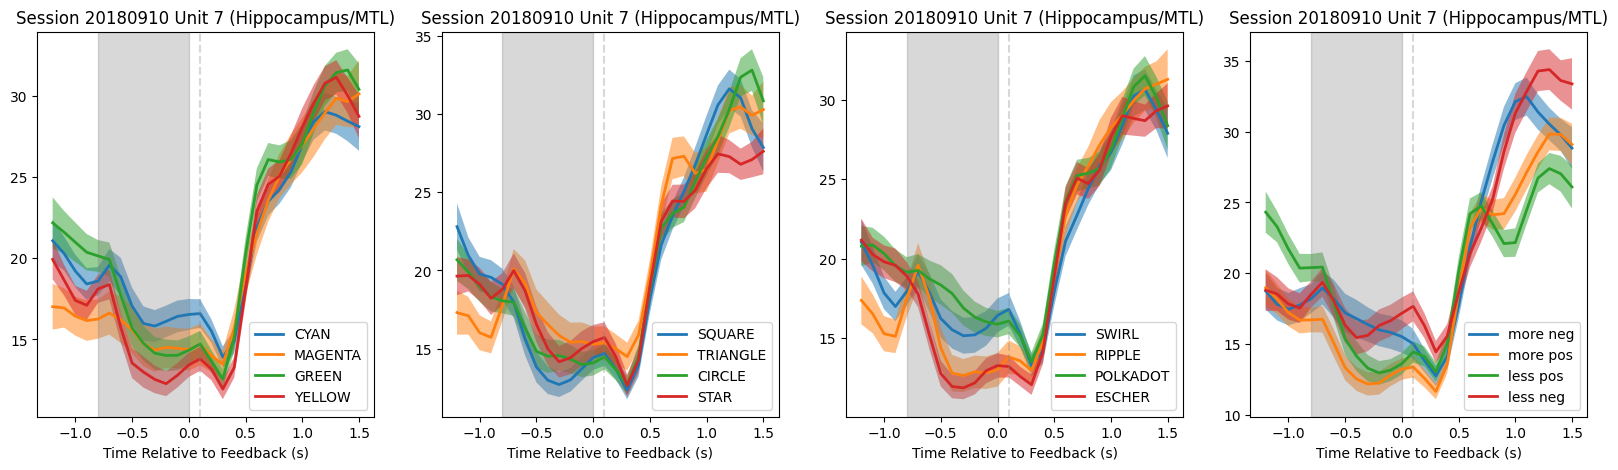

In [7]:
hf_units.apply(plot_features_frs_for_unit, axis=1)